<a href="https://colab.research.google.com/github/Naresh-Cloud12/ANSIBLE_PROJECT/blob/main/Minor_Project_Cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv("/content/cardio_train (1).csv", sep=';')  # Dataset uses ; as separator

# Display basic info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


(None,
    id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
 0   0  18393       2     168    62.0    110     80            1     1      0   
 1   1  20228       1     156    85.0    140     90            3     1      0   
 2   2  18857       1     165    64.0    130     70            3     1      0   
 3   3  17623       2     169    82.0    150    100            1     1      0   
 4   4  17474       1     156    56.0    100     60            1     1      0   
 
    alco  active  cardio  
 0     0       1       0  
 1     0       1       1  
 2     0       0       1  
 3     0       1       1  
 4     0       0       0  )

In [5]:
# Step 1: Data Preprocessing

# Drop the 'id' column since it is not useful for prediction
df.drop(columns=['id'], inplace=True)

# Convert age from days to years
df['age'] = (df['age'] / 365).astype(int)

# Check for duplicates and remove them
initial_shape = df.shape
df.drop_duplicates(inplace=True)
final_shape = df.shape

# Check for outliers in ap_hi and ap_lo
bp_outliers = df[(df['ap_hi'] < 80) | (df['ap_hi'] > 240) | (df['ap_lo'] < 40) | (df['ap_lo'] > 180)]

# Remove rows with clearly invalid blood pressure values
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 240)]
df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 180)]

# Final shape after cleaning
df.shape, initial_shape, final_shape, bp_outliers.shape

((65549, 12), (70000, 12), (66792, 12), (1243, 12))

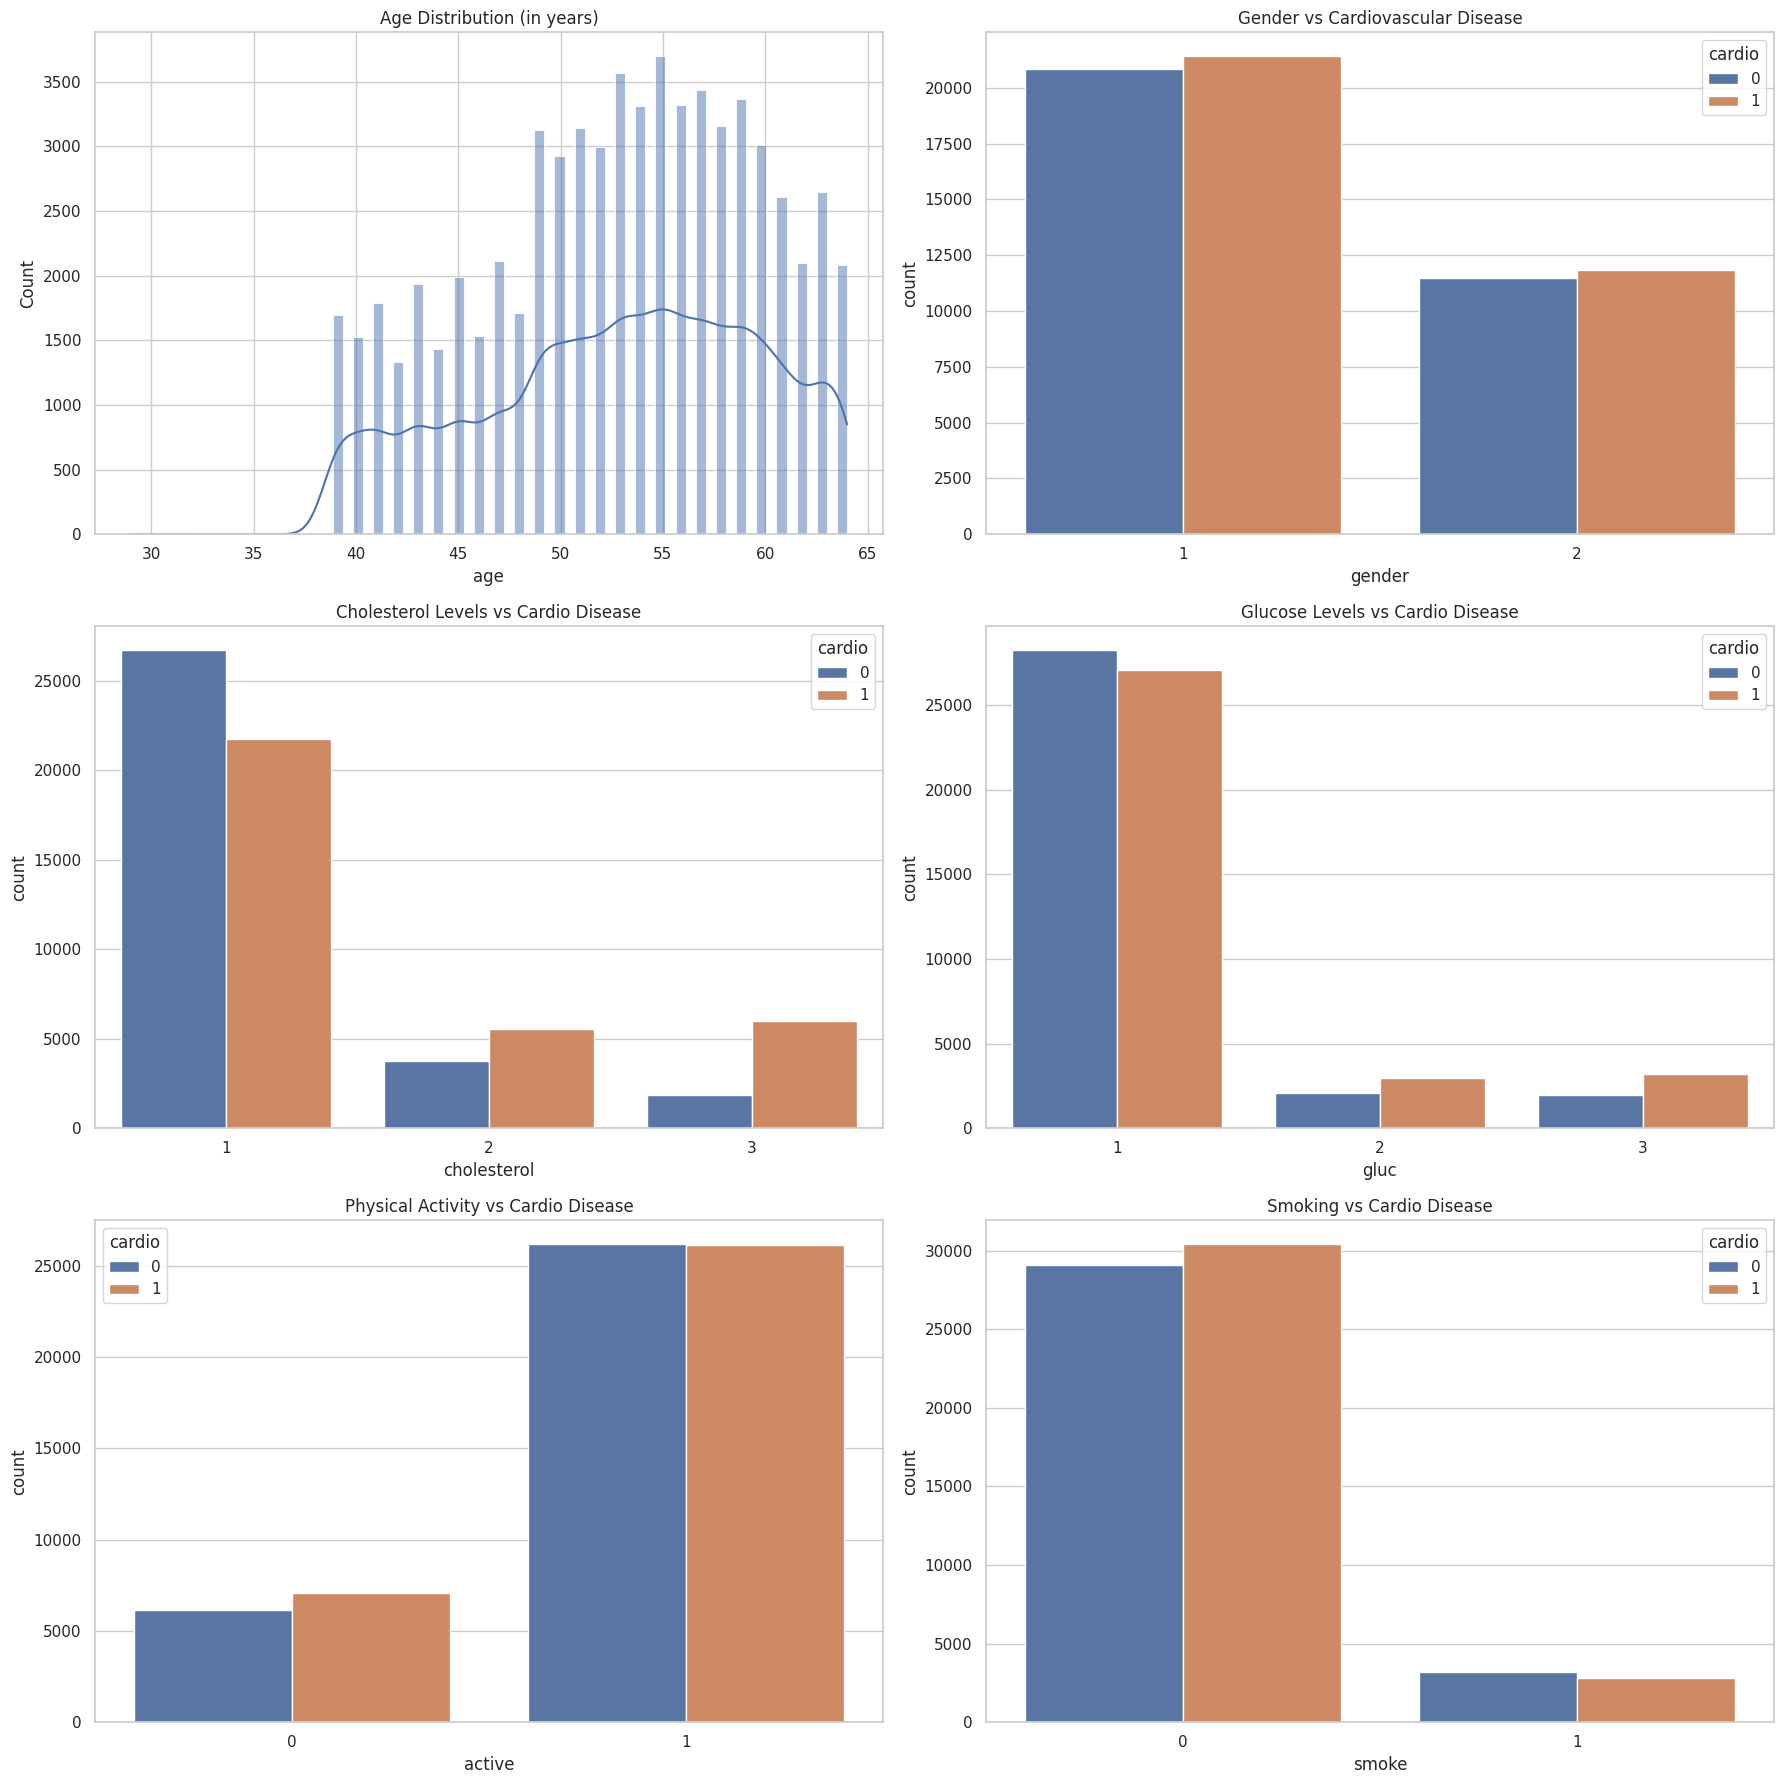

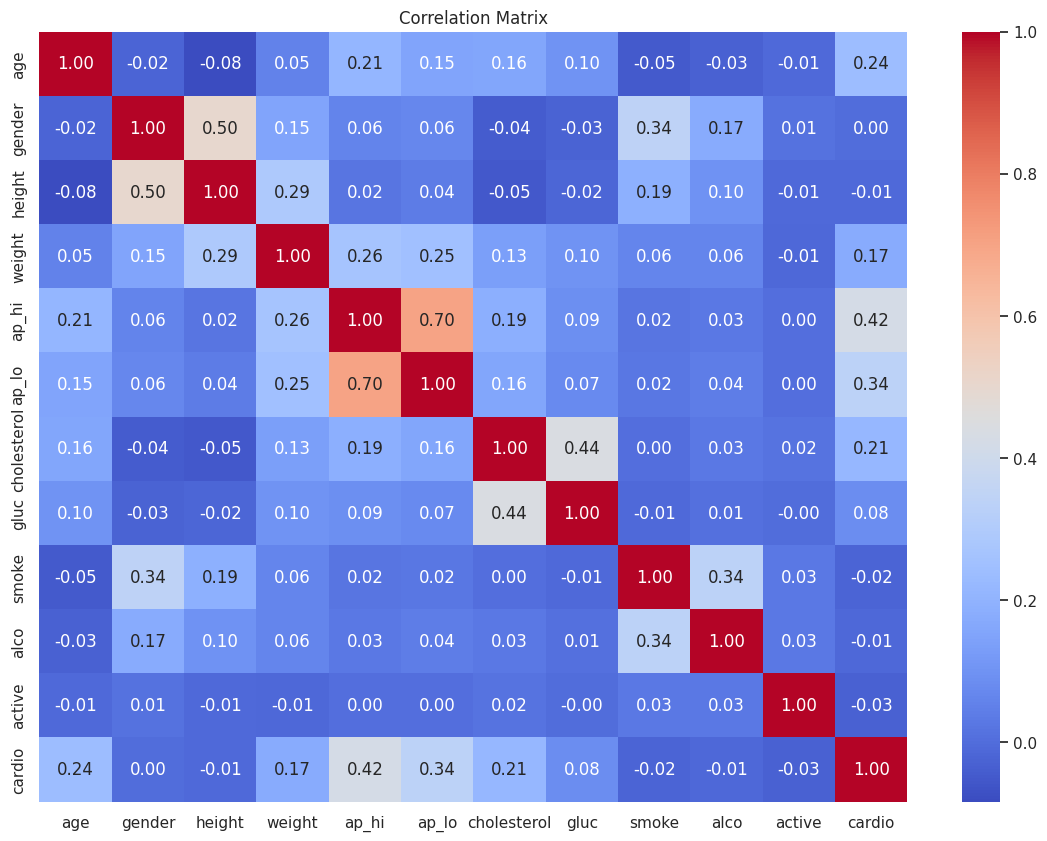

{'SVM': 0.7252479023646071,
 'KNN': 0.6824561403508772,
 'Decision Tree': 0.6121281464530892,
 'Logistic Regression': 0.721815408085431,
 'Random Forest': 0.6873379099923722}

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Set style for plots
sns.set(style="whitegrid")

# EDA & Visualizations
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Age distribution
sns.histplot(df['age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Age Distribution (in years)")

# Gender vs Cardio
sns.countplot(x='gender', hue='cardio', data=df, ax=axs[0, 1])
axs[0, 1].set_title("Gender vs Cardiovascular Disease")

# Cholesterol levels
sns.countplot(x='cholesterol', hue='cardio', data=df, ax=axs[1, 0])
axs[1, 0].set_title("Cholesterol Levels vs Cardio Disease")

# Glucose levels
sns.countplot(x='gluc', hue='cardio', data=df, ax=axs[1, 1])
axs[1, 1].set_title("Glucose Levels vs Cardio Disease")

# Active vs Cardio
sns.countplot(x='active', hue='cardio', data=df, ax=axs[2, 0])
axs[2, 0].set_title("Physical Activity vs Cardio Disease")

# Smoking vs Cardio
sns.countplot(x='smoke', hue='cardio', data=df, ax=axs[2, 1])
axs[2, 1].set_title("Smoking vs Cardio Disease")

plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Prepare data for ML
X = df.drop("cardio", axis=1)
y = df["cardio"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc

accuracies
